In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Diamond Price Prediction Analysis**

This notebook analyzes the diamonds dataset to understand factors affecting diamond prices. It includes data cleaning, visualization, and multiple regression models — Linear Regression, PCA Regression, Lasso, and Ridge — for price prediction.

In [5]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/diamonds.csv')
df.head()


Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [17]:

df = df.drop(columns=['Unnamed: 0'])

print(df.isnull().sum())


print(df.info())
print("Shape:", df.shape)


KeyError: "['Unnamed: 0'] not found in axis"

**Load and Preview Dataset**
We have loaded the diamonds dataset which we downloaded from Kaggle from Google Drive and then preview the first few rows to understand its structure.

In [18]:
df.describe()


carat         depth         table         price             x  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834   3930.993231      5.731627   
std        0.473795      1.432331      2.234064   3987.280446      1.119423   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5323.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53920.000000  53920.000000  
mean       5.734887      3.540046  
std        1.140126      0.702530  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

**Visualization**

Here we are visualizing the relationship between carat and price to identify any visible correlation.

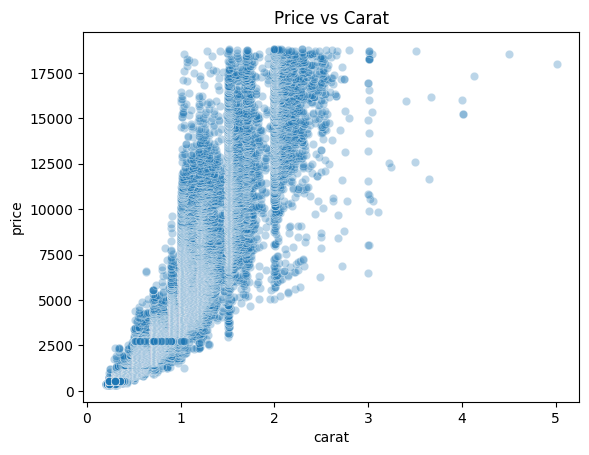

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='carat', y='price', alpha=0.3)
plt.title('Price vs Carat')
plt.show()


**Removing Outliers and Sampling Data**
Here we are removing rows with invalid measurements (where x, y, or z = 0) and then we sample 12,500 records for faster computation.

In [9]:
df = df[(df[['x', 'y', 'z']] != 0).all(axis=1)]

diamonds_model = df.sample(n=12500, random_state=42)

diamonds_model.shape


(12500, 10)

**Linear Regression Model**
Here we apply one-hot encoding for categorical variables and then train a linear regression model to predict diamond prices.

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


X = diamonds_model.drop('price', axis=1)
y = diamonds_model['price']

# Identifying all the categories
categorical_cols = ['cut', 'color', 'clarity']
numeric_cols = [col for col in X.columns if col not in categorical_cols]


preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

# Transform data
X_encoded = preprocessor.fit_transform(X)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.9273622646199622
RMSE: 1089.3167680028637


**PCA Regression Model**

>Here we have usyed Principal Component Analysis (PCA) on numerical features to reduce dimensionality and train a regression model using two principal components.



In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

numeric_features = diamonds_model[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features.drop('price', axis=1))


In [14]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

#dataframe
pca_df = pd.DataFrame(pca.components_, columns=numeric_features.columns[:-1], index=['PC1', 'PC2'])
pca_df


carat     depth     table         x         y         z
PC1  0.498189 -0.002000  0.128071  0.503115  0.497657  0.484370
PC2  0.047295  0.734292 -0.668271  0.009759  0.012229  0.108383

from matplotlib import pyplot as plt
pca_df['carat'].plot(kind='hist', bins=20, title='carat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_df['depth'].plot(kind='hist', bins=20, title='depth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_df['table'].plot(kind='hist', bins=20, title='table')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_df['x'].plot(kind='hist', bins=20, title='x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_df.plot(kind='scatter', x='carat', y='depth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_df.plot(kind='scatter', x='depth', y='table', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_df.plot(kind='scatter', x='table', y='x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_df.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['depth']
  ys = series['carat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pca_df.sort_values('depth', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('depth')
_ = plt.ylabel('carat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['depth']
  ys = series['table']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pca_df.sort_values('depth', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('depth')
_ = plt.ylabel('table')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['depth']
  ys = series['x']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pca_df.sort_values('depth', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('depth')
_ = plt.ylabel('x')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['depth']
  ys = series['y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pca_df.sort_values('depth', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('depth')
_ = plt.ylabel('y')

from matplotlib import pyplot as plt
pca_df['carat'].plot(kind='line', figsize=(8, 4), title='carat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pca_df['depth'].plot(kind='line', figsize=(8, 4), title='depth')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pca_df['table'].plot(kind='line', figsize=(8, 4), title='table')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pca_df['x'].plot(kind='line', figsize=(8, 4), title='x')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
X_pca = diamonds_model[['carat', 'x']]
y = diamonds_model['price']

#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# training regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

pca_model = LinearRegression()
pca_model.fit(X_train, y_train)


y_pred = pca_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score (PCA Model):", r2)
print("RMSE (PCA Model):", rmse)


R² Score (PCA Model): 0.8612625897782916
RMSE (PCA Model): 1505.4621208489982


**Regularization: Lasso and Ridge Regression**:

In order to handle potential overfitting, we test Lasso and Ridge regression models and compare their R² and RMSE values.

In [16]:
from sklearn.linear_model import Lasso, Ridge

#the Lasso technique
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

#the Ridge regularisation technique
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Lasso -> R²:", r2_lasso, " | RMSE:", rmse_lasso)
print("Ridge -> R²:", r2_ridge, " | RMSE:", rmse_ridge)


Lasso -> R²: 0.8611607821957203  | RMSE: 1506.0143848409377
Ridge -> R²: 0.8611803659394202  | RMSE: 1505.9081668706237


**Conclusion**
Linear Regression: R² ≈ 0.93 (best performance)
PCA Model: R² ≈ 0.86 (loss of variance due to dimensionality reduction)
Lasso/Ridge: Similar R² ≈ 0.86, showing limited improvement from regularization.
Overall, the linear model using all encoded features performs best for predicting diamond prices therefore the Linear Regression Model registered the highest accuracy.

There are certain factors that are likely to lead to this performance, these include the fact that the linear regression model exercised full feature utilization.
The Linear Regression model used all original features (carat, cut, color, clarity, depth, table, x, y, z), capturing all available information and interactions affecting diamond price.
No information loss:
Unlike PCA (which compressed data into fewer dimensions) or regularized models like Lasso and Ridge (which shrink coefficients), Linear Regression retained the complete variance structure of the dataset — meaning it could fully model how each feature contributes to price.
Strong linear relationships:
The relationship between price and continuous variables like carat, x, y, and z is mostly linear, so a basic linear regression model naturally fits the data well without needing penalty or transformation.
Low noise and clean data:
Since the dataset was cleaned (zero and missing values removed), the model could train effectively without noise, allowing it to achieve a higher R².

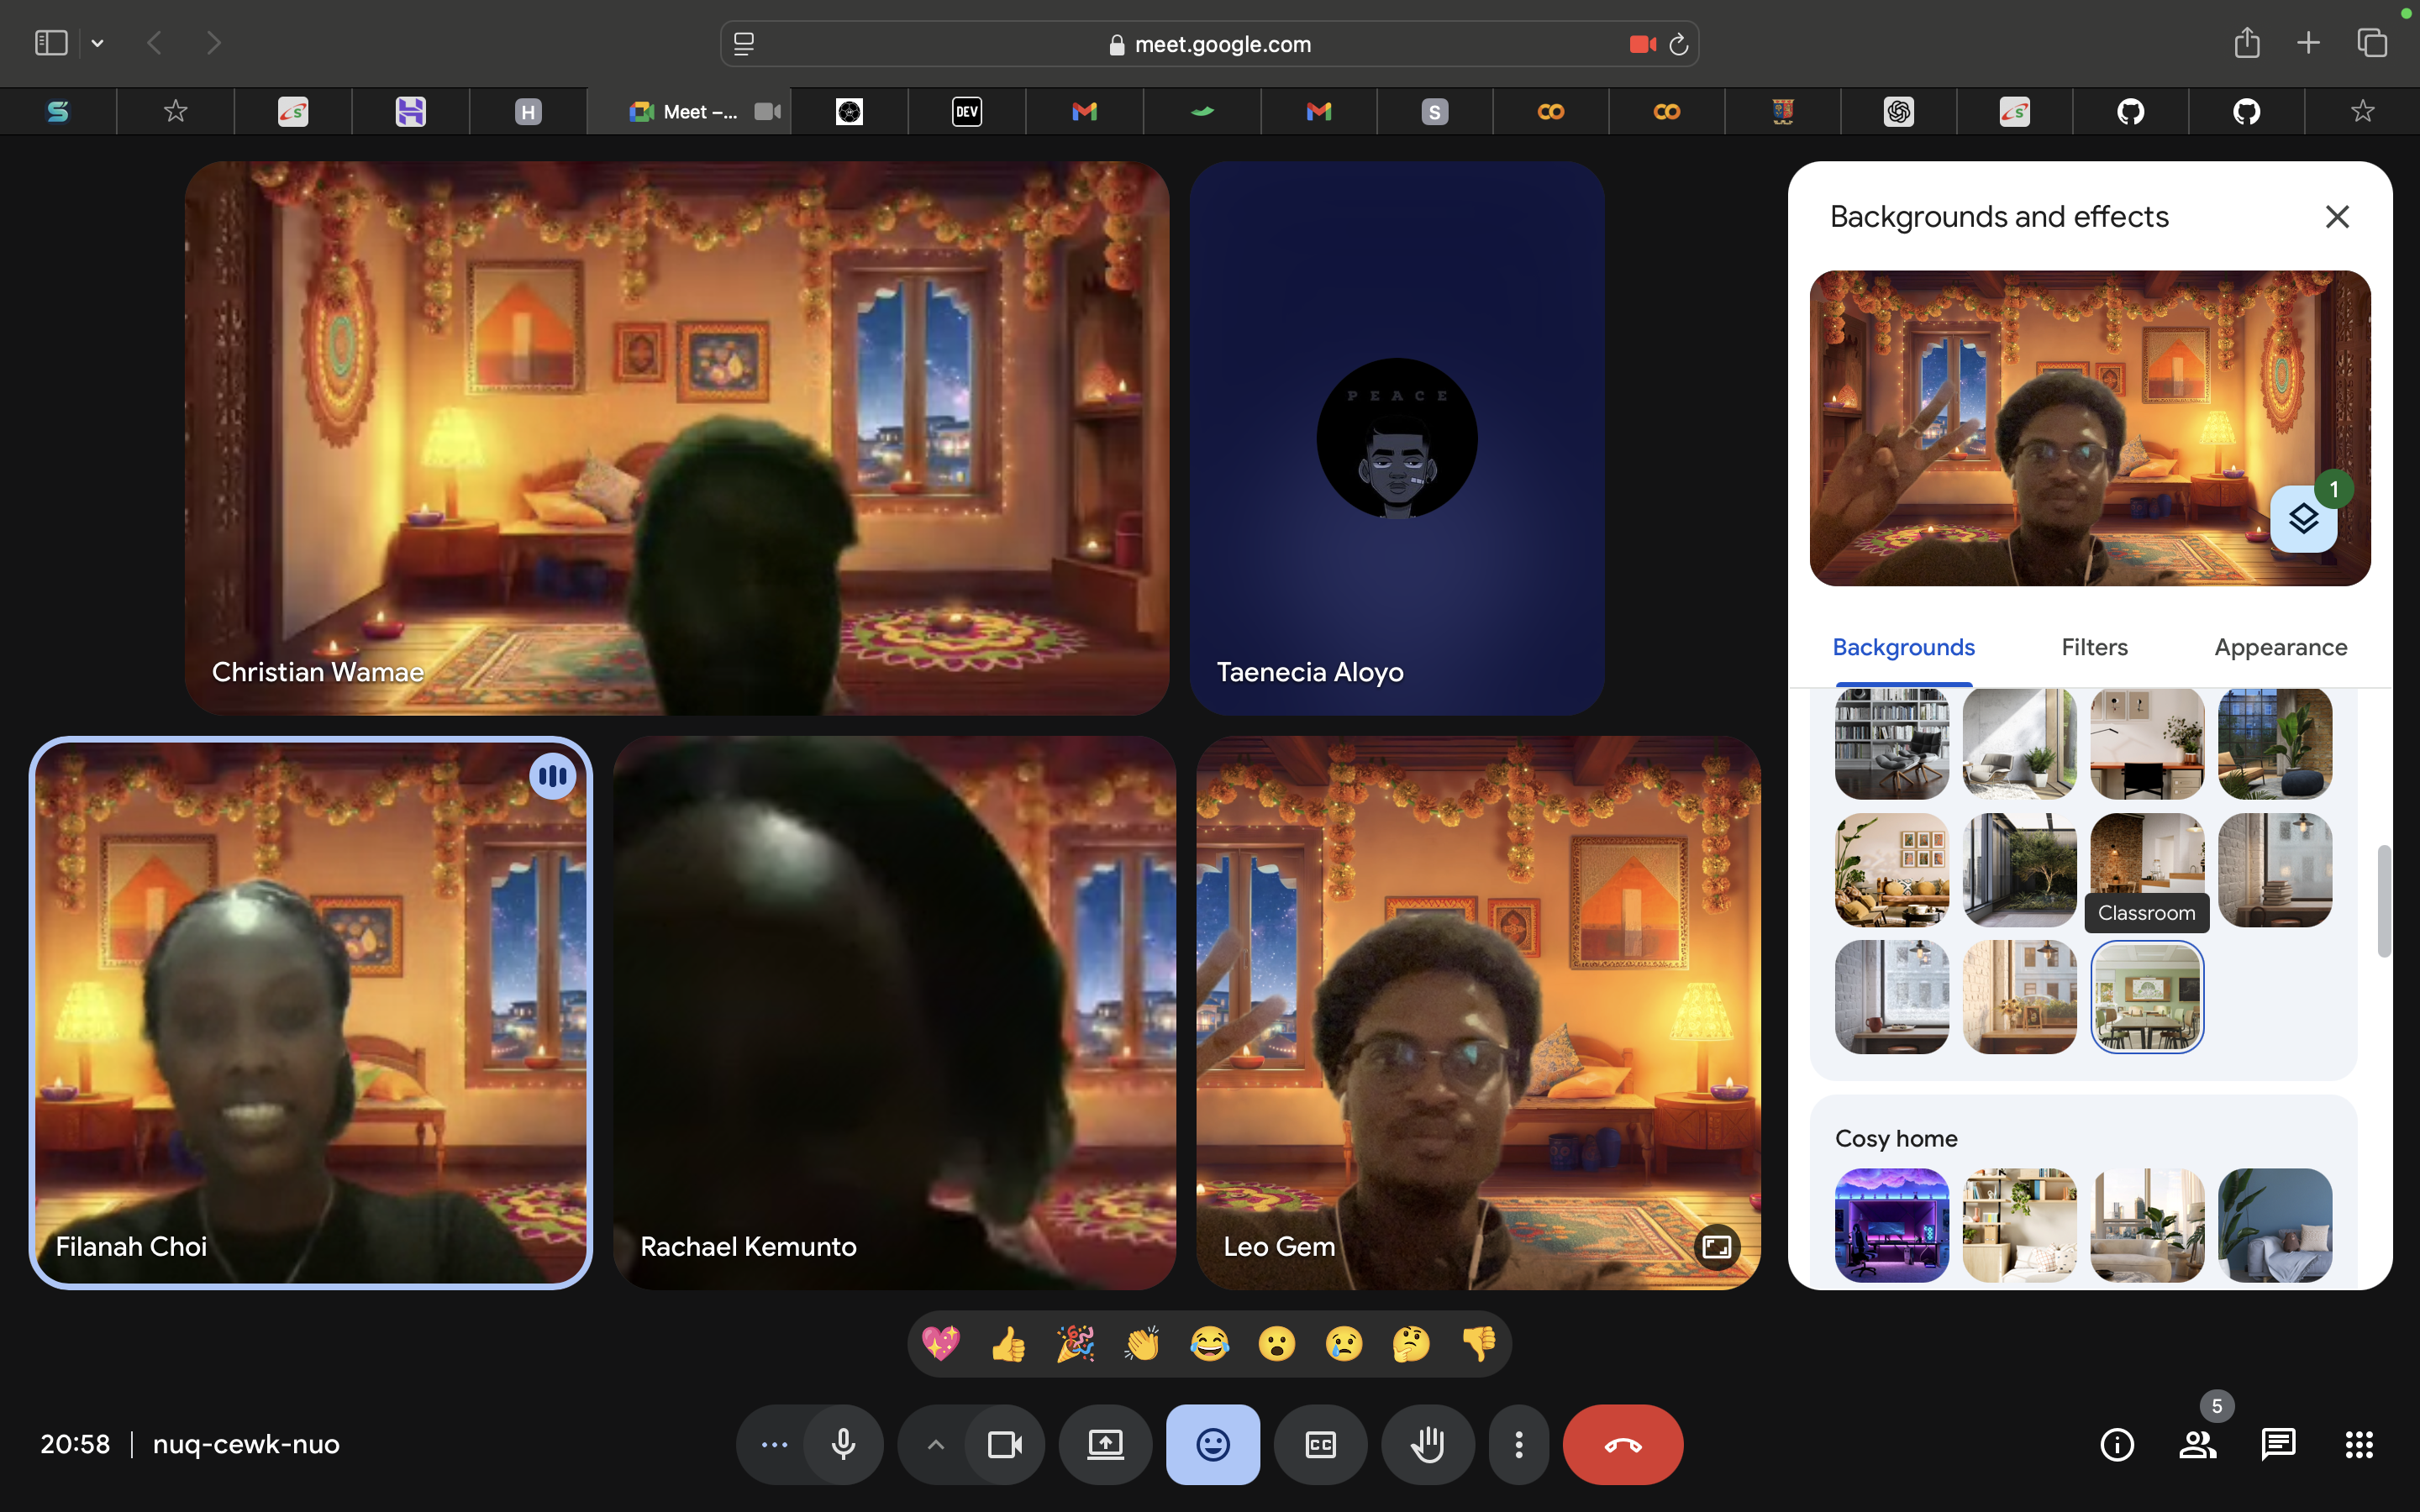

In [22]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Screenshot 2025-11-03 at 18.58.29.png'))
